In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from random import seed
from random import random
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
#from sklearn.metrics import roc_auc_score
import time

In [2]:
# file import and read
#=======================

#df = pd.read_csv(r"C:\Users\Shylu\Desktop\MS prep\2nd sem\ML\Assignment1\sgemm_product_dataset\sgemm_product.csv")
df = pd.read_csv("sgemm_product.csv")
df.describe()

df_orig = df.copy()
# generate target variable as average of runs
df['y']=(df['Run1 (ms)']+df['Run2 (ms)']+df['Run3 (ms)']+df['Run4 (ms)'])/4

#print(df['y'])
# remove extra fields in data set
df.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], axis=1, inplace=True)


In [1]:
# remove outliers

df = df[~(np.abs(df['y']-df['y'].mean()) > (3*df['y'].std()))] #count= 5251 = 2.17% of data
df

#236349 rows 

NameError: name 'df1' is not defined

In [4]:
# normalize data and split into train and test sets
#===================================================

df['MWG'] = (df['MWG']-df['MWG'].min())/ (df['MWG'].max() - df['MWG'].min())   # (x-min)/(max-min)
df['NWG'] = (df['NWG']-df['NWG'].min())/ (df['NWG'].max() - df['NWG'].min())
df['KWG'] = (df['KWG']-df['KWG'].min())/ (df['KWG'].max() - df['KWG'].min())
df['MDIMC'] = (df['MDIMC']-df['MDIMC'].min())/ (df['MDIMC'].max() - df['MDIMC'].min())
df['NDIMC'] = (df['NDIMC']-df['NDIMC'].min())/ (df['NDIMC'].max() - df['NDIMC'].min())
df['MDIMA'] = (df['MDIMA']-df['MDIMA'].min())/ (df['MDIMA'].max() - df['MDIMA'].min())
df['NDIMB'] = (df['NDIMB']-df['NDIMB'].min())/ (df['NDIMB'].max() - df['NDIMB'].min())
df['KWI'] = (df['KWI']-df['KWI'].min())/ (df['KWI'].max() - df['KWI'].min())
df['VWM'] = (df['VWM']-df['VWM'].min())/ (df['VWM'].max() - df['VWM'].min())
df['VWN'] = (df['VWN']-df['VWN'].min())/ (df['VWN'].max() - df['VWN'].min())
#df['y'] = (df['y']-df['y'].min())/ (df['y'].max() - df['y'].min())
#strm = df['STRM']
#strn = df['STRN']
#sa = df['SA']
#sb = df['SB']

# split into train and test data set (70/30)
train, test = train_test_split(df,train_size=0.7, test_size=0.3, random_state=0)

#print(train)

In [5]:
  # df.describe()
df['y'].size
print(train)
print(test)
df

             MWG       NWG  KWG     MDIMC     NDIMC     MDIMA     NDIMB  KWI  \
162742  1.000000  0.142857  1.0  0.333333  0.000000  0.000000  0.000000  1.0   
141497  0.428571  1.000000  1.0  1.000000  0.333333  1.000000  1.000000  0.0   
98143   0.428571  0.428571  1.0  0.000000  0.000000  0.333333  0.333333  1.0   
212714  1.000000  1.000000  0.0  0.333333  0.000000  1.000000  0.333333  0.0   
220184  1.000000  1.000000  1.0  0.000000  0.000000  1.000000  0.333333  0.0   
...          ...       ...  ...       ...       ...       ...       ...  ...   
177750  1.000000  0.428571  0.0  0.333333  0.000000  0.333333  0.333333  0.0   
117952  0.428571  1.000000  0.0  0.333333  0.000000  0.000000  0.000000  0.0   
174472  1.000000  0.428571  0.0  0.000000  0.333333  1.000000  0.000000  0.0   
43567   0.142857  0.428571  1.0  0.333333  0.000000  1.000000  0.000000  1.0   
201006  1.000000  1.000000  0.0  0.000000  0.000000  0.000000  0.333333  0.0   

             VWM       VWN  STRM  STRN 

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,116.3700
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0,1,78.7050
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,1,0,80.5650
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,1,1,86.6375
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,1,0,0,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.428571,0.428571,1,0,1,1,17.8175
241596,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.428571,0.428571,1,1,0,0,36.0350
241597,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.428571,0.428571,1,1,0,1,35.1600
241598,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.428571,0.428571,1,1,1,0,28.4525


In [6]:
def get_initial_beta(number_of_betas):
    #number_of_betas=14
    rand_beta = []
    seed(123)
    for i in range (0,number_of_betas):
        rand=random()
        rand_beta.append([rand])
    #print  (np.asarray(rand_beta))       
    return np.asarray(rand_beta)

In [7]:

# convert dataset to vector representation - training
#=====================================================
def get_x_y_beta_vector_train():
    #y_vector
    #=========
    y_vector=np.vstack(train['y']) 
    #.to_numpy()
    #y_vector.transpose()
    #y_vector

    #x_vector
    #=========
    #get all columns of training set except y column
    x_vector_data = train.iloc[:,0:len(train.columns)-1].to_numpy()
    #print(x_vector.shape[1]) #get number of columns

    ones=np.ones((x_vector_data.shape[0],1))

    #print(train.iloc[:,0:len(df.columns)-1].to_numpy())
    #print (x_vector_data.shape)
    #print (ones.shape)

    x_vector=np.hstack([ones,x_vector_data])
    #x_vector

    # beta vector
    #=============
    beta_vector = get_initial_beta(len(train.columns)) # additional beta to get intercept
    #beta_vector
    
    return (x_vector,y_vector,beta_vector) 

In [8]:

# convert dataset to vector representation - test
#=================================================
def get_x_y_vector_test():
    #y_vector
    #=========
    y_vector=np.vstack(test['y']) 
    #.to_numpy()
    #y_vector.transpose()
    #y_vector

    #x_vector
    #=========
    #get all columns of training set except y column
    x_vector_data = test.iloc[:,0:len(test.columns)-1].to_numpy()
    #print(x_vector.shape[1]) #get number of columns

    ones=np.ones((x_vector_data.shape[0],1))

    #print(train.iloc[:,0:len(df.columns)-1].to_numpy())
    #print (x_vector_data.shape)
    #print (ones.shape)

    x_vector=np.hstack([ones,x_vector_data])
    #x_vector
    
    return (x_vector,y_vector) 

In [9]:
# gradient descent linear regression
#====================================
def gradient_descent_linear_reg(threshold,alpha,max_iterations,m,x_vector_1,y_vector_1,beta_vector_1):
    it=0
    cost_list=[]
    rmse_list=[]
    for i in range(1,max_iterations+1):
        it+=1
        y_pred_1 = np.matmul(x_vector_1,beta_vector_1)
        sum_sq = np.sum(np.square(y_pred_1 - y_vector_1))
        cost_fn = sum_sq/(2*m)            # calculating cost function
        rmse = np.sqrt(cost_fn)
        if len(cost_list)>1:
            if (cost_fn < cost_list[-1] ): # if cost increases, we have gone past minimum. SO cut off
                if (cost_list[-1] - cost_fn < threshold):
                    break
            else:    
                break       
        cost_list.append(cost_fn)
        rmse_list.append(rmse)
        #print("Cost: {0}".format(cost_list[-1]))        
        partial_diff = np.sum(x_vector_1.T.dot(y_pred_1 - y_vector_1))  # same as partial_diff = np.matmul(x_vector.T, (y_pred-y_vector))
        beta_vector_1 = beta_vector_1 - alpha*(1/m)*(partial_diff) 
        #print(beta_vector.T)
    print("Completed") 
    return (cost_list, rmse_list, beta_vector_1,it)

Completed
The training cost list is:
41457.33355184212
39969.603715873345
38628.212635711185
37418.76587566357
36328.284891391006
35345.067757456774
34458.56359424414
33659.259346718776
32938.57770006209
32288.785036710462
31702.90844708953
31174.660903487904
30698.373794112726
30268.936093351647
29881.73951547894
29532.62906325118
29217.85844073103
28934.049851874795
28678.157753483665
28447.43617355222
28239.409244308434
28051.844633735553
27882.72959047051
27730.24934501704
27592.767635497497
27468.809148965658
27357.043689858667
27256.271905700214
27165.412416877658
27083.49021238324
27009.626186994217
26943.02770761559
26882.98010755341
26828.839017443377
26780.02345053868
26736.009568155005
26696.325058370112
26660.544067655905
26628.2826310543
26599.19455185851
26572.96768658436
26549.320595366047
26527.999521831644
26508.7756700495
26491.44274932459
26475.814760497968
26461.723999994232
26449.01926019844
26437.564206850828
26427.23591604711
26417.923555144956
26409.527193421614

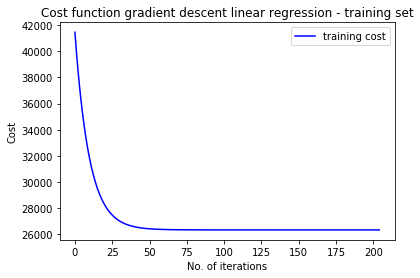

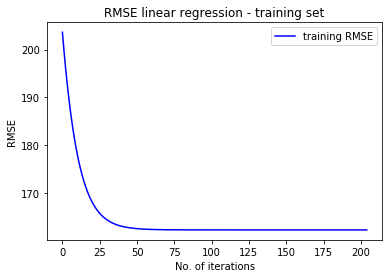

In [10]:
#m = train['y'].size  #no.of data points
max_iterations = 10000
threshold = 0.000001
alpha=0.001

# Call gradient descent linear regression algorithm on training set 
#===================================================================
x_vector, y_vector, beta_vector = get_x_y_beta_vector_train() 
cost_list_train, rmse_list_train, optimal_beta_vector_train,iteration = gradient_descent_linear_reg(threshold,alpha,max_iterations,train['y'].size,x_vector,y_vector,beta_vector)

#print cost_list, RMSE, Optimal beta
print("The training cost list is:")
for i in range(0,len(cost_list_train)):
    print(cost_list_train[i])

print("Minimum cost for training set is {0}".format(cost_list_train[-1]))
print("RMSE for training set is {0}".format(rmse_list_train[-1]))
print("optimal beta for training set:")
print(optimal_beta_vector_train.T)


# plot Cost function
plt.title("Cost function gradient descent linear regression - training set")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot(cost_list_train,'b', label = 'training cost')
plt.legend()
plt.show()

# plot RMSE
plt.title("RMSE linear regression - training set")
plt.xlabel("No. of iterations")
plt.ylabel("RMSE")
plt.plot(rmse_list_train,'b', label = 'training RMSE')
plt.legend()
plt.show()

In [24]:

# calculate y predicted values using the optimal beta vector obtained from training set 
#=======================================================================================
m=test['y'].size
x_vector, y_vector = get_x_y_vector_test() 
y_pred_test = np.matmul(x_vector,optimal_beta_vector_train)
sum_sq_test = np.sum(np.square(y_pred_test - y_vector))
cost_fn_test = sum_sq_test/(2*m)            # calculating cost function
rmse_test = np.sqrt(cost_fn_test)

print("Estimated test cost is {0}".format(cost_fn_test))
print("Estimated test RMSE is {0}".format(rmse_test))



Estimated test cost is 26268.567359844
Estimated test RMSE is 162.07580744776192


In [25]:
def plot_alpha(threshold,alpha, max_iter):
    print("Alpha = {0}".format(alpha))
    x_vector, y_vector, beta_vector = get_x_y_beta_vector_train()

    cost_list_train, rmse_list_train, optimal_beta_vector_train, iteration = gradient_descent_linear_reg(threshold,alpha,max_iter,train['y'].size,x_vector,y_vector,beta_vector)   
        
    print("Minimum cost for training set is {0}:".format(cost_list_train[-1]))
    print("RMSE for training set is {0}".format(rmse_list_train[-1]))
    
    m=test['y'].size
    x_vector, y_vector = get_x_y_vector_test() 
    y_pred_test = np.matmul(x_vector,optimal_beta_vector_train)
    sum_sq_test = np.sum(np.square(y_pred_test - y_vector))
    cost_fn_test = sum_sq_test/(2*m)            # calculating cost function
    rmse_test = np.sqrt(cost_fn_test)

    print("Estimated test cost is {0}".format(cost_fn_test))
    print("Estimated test RMSE is {0}".format(rmse_test))
    
    return (cost_list_train, rmse_list_train, iteration)
    

Alpha = 0.015
Completed
Minimum cost for training set is 26332.56391735016:
RMSE for training set is 162.27311520196486
Estimated test cost is 26268.565334348747
Estimated test RMSE is 162.07580119915727
Alpha = 0.01
Completed
Minimum cost for training set is 26332.575285711562:
RMSE for training set is 162.2731502304419
Estimated test cost is 26268.536970364974
Estimated test RMSE is 162.0757136969169
Alpha = 0.005
Completed
Minimum cost for training set is 26332.57643294714:
RMSE for training set is 162.27315376533218
Estimated test cost is 26268.520928625778
Estimated test RMSE is 162.07566420849793
Alpha = 0.003
Completed
Minimum cost for training set is 26332.593289490236:
RMSE for training set is 162.27320570411567
Estimated test cost is 26268.495403623463
Estimated test RMSE is 162.0755854643859
Alpha = 0.001
Completed
Minimum cost for training set is 26427.23591604711:
RMSE for training set is 162.5645592250879
Estimated test cost is 26348.08963494573
Estimated test RMSE is 162

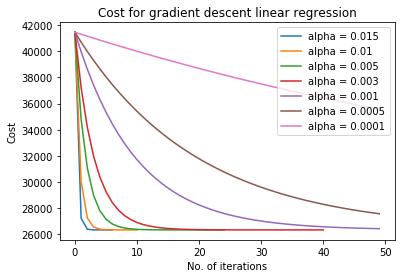

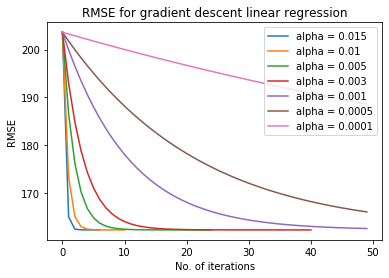

Time taken to execute for alpha = 0.015 is 0.7888498306274414. Iteration is 8
Time taken to execute for alpha = 0.01 is 0.922534704208374. Iteration is 12
Time taken to execute for alpha = 0.005 is 1.3444056510925293. Iteration is 26
Time taken to execute for alpha = 0.003 is 1.0900852680206299. Iteration is 42
Time taken to execute for alpha = 0.001 is 1.177854061126709. Iteration is 50
Time taken to execute for alpha = 0.0005 is 1.163888931274414. Iteration is 50
Time taken to execute for alpha = 0.0001 is 0.9823741912841797. Iteration is 50


In [26]:

# experiment with multiple alpha - linear regression
#=====================================================

max_iter = 50
threshold = 0.01

start_time_1 = time.time()
cost_list1, rmse_list1, iter1 = plot_alpha(threshold,0.015,max_iter)
end_time_1 = time.time()

start_time_2 = time.time()
cost_list2, rmse_list2, iter2 = plot_alpha(threshold,0.01,max_iter)
end_time_2 = time.time()

start_time_3 = time.time()
cost_list3, rmse_list3, iter3 = plot_alpha(threshold,0.005,max_iter)
end_time_3 = time.time()

start_time_4 = time.time()
cost_list4, rmse_list4, iter4 = plot_alpha(threshold,0.003,max_iter)
end_time_4 = time.time()

start_time_5 = time.time()
cost_list5, rmse_list5, iter5 = plot_alpha(threshold,0.001,max_iter)
end_time_5 = time.time()

start_time_6 = time.time()
cost_list6, rmse_list6, iter6 = plot_alpha(threshold,0.0005,max_iter)
end_time_6 = time.time()

start_time_7 = time.time()
cost_list7, rmse_list7, iter7 = plot_alpha(threshold,0.0001,max_iter)
end_time_7 = time.time()


#Plot cost
plt.title("Cost for gradient descent linear regression")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot(cost_list1, label = 'alpha = 0.015')
plt.plot(cost_list2, label = 'alpha = 0.01')
plt.plot(cost_list3, label = 'alpha = 0.005')
plt.plot(cost_list4, label = 'alpha = 0.003')
plt.plot(cost_list5, label = 'alpha = 0.001')
plt.plot(cost_list6, label = 'alpha = 0.0005')
plt.plot(cost_list7, label = 'alpha = 0.0001')
plt.legend()
plt.show()

    
# plot RMSE
plt.title("RMSE for gradient descent linear regression")
plt.xlabel("No. of iterations")
plt.ylabel("RMSE")
plt.plot(rmse_list1, label = 'alpha = 0.015')
plt.plot(rmse_list2, label = 'alpha = 0.01')
plt.plot(rmse_list3, label = 'alpha = 0.005')
plt.plot(rmse_list4, label = 'alpha = 0.003')
plt.plot(rmse_list5, label = 'alpha = 0.001')
plt.plot(rmse_list6, label = 'alpha = 0.0005')
plt.plot(rmse_list7, label = 'alpha = 0.0001')

plt.legend()
plt.show()


print("Time taken to execute for alpha = 0.015 is {0}. Iteration is {1}".format((end_time_1-start_time_1), iter1))
print("Time taken to execute for alpha = 0.01 is {0}. Iteration is {1}".format((end_time_2-start_time_2), iter2))
print("Time taken to execute for alpha = 0.005 is {0}. Iteration is {1}".format((end_time_3-start_time_3), iter3))
print("Time taken to execute for alpha = 0.003 is {0}. Iteration is {1}".format((end_time_4-start_time_4), iter4))
print("Time taken to execute for alpha = 0.001 is {0}. Iteration is {1}".format((end_time_5-start_time_5), iter5))
print("Time taken to execute for alpha = 0.0005 is {0}. Iteration is {1}".format((end_time_6-start_time_6), iter6))
print("Time taken to execute for alpha = 0.0001 is {0}. Iteration is {1}".format((end_time_7-start_time_7), iter7))






In [27]:
def plot_threshold(alpha,threshold, max_iter):
    print("Threshold = {0}".format(threshold))
    x_vector, y_vector, beta_vector = get_x_y_beta_vector_train()
    cost_list_train, rmse_list_train, optimal_beta_vector_train, iteration = gradient_descent_linear_reg(threshold,alpha,max_iter,train['y'].size,x_vector,y_vector,beta_vector)
    
    print("Minimum cost for training set is {0}:".format(cost_list_train[-1]))
    print("RMSE for training set is {0}".format(rmse_list_train[-1]))
    
   
    m=test['y'].size
    x_vector, y_vector = get_x_y_vector_test() 
    y_pred_test = np.matmul(x_vector,optimal_beta_vector_train)
    sum_sq_test = np.sum(np.square(y_pred_test - y_vector))
    cost_fn_test = sum_sq_test/(2*m)            # calculating cost function
    rmse_test = np.sqrt(cost_fn_test)

    print("Estimated test cost is {0}".format(cost_fn_test))
    print("Estimated test RMSE is {0}".format(rmse_test))
    
    return (cost_list_train, rmse_list_train, iteration)
    

Threshold = 10000
Completed
Minimum cost for training set is 27226.981463612454:
RMSE for training set is 165.00600432594098
Estimated test cost is 26316.83684696625
Estimated test RMSE is 162.2246493199053
Threshold = 5000
Completed
Minimum cost for training set is 30045.29038556949:
RMSE for training set is 173.3357735309405
Estimated test cost is 27162.088576643317
Estimated test RMSE is 164.8092490627978
Threshold = 1000
Completed
Minimum cost for training set is 27810.412277933974:
RMSE for training set is 166.7645414287281
Estimated test cost is 27077.744455379096
Estimated test RMSE is 164.55316604483517
Threshold = 10
Completed
Minimum cost for training set is 26362.150187368934:
RMSE for training set is 162.36425156840693
Estimated test cost is 26286.918139666344
Estimated test RMSE is 162.1324092822479
Threshold = 0.1
Completed
Minimum cost for training set is 26333.557767632155:
RMSE for training set is 162.2761774495325
Estimated test cost is 26268.852217739663
Estimated te

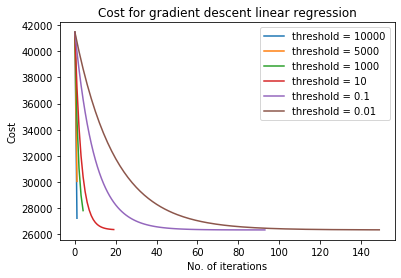

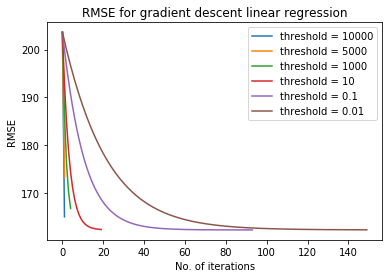

In [29]:

# experiment with multiple threshold of convergence - linear regression
#=======================================================================

max_iter = 150
#alpha = 0.001
# varying alpha as well to show difference without overlap of curves. 

cost_list1, rmse_list1, iter1 = plot_threshold(0.015,10000,max_iter)
cost_list2, rmse_list2, iter2 = plot_threshold(0.01,5000,max_iter)
cost_list3, rmse_list3, iter3 = plot_threshold(0.005,1000,max_iter)
cost_list4, rmse_list4, iter4 = plot_threshold(0.003,10,max_iter)
cost_list5, rmse_list5, iter5 = plot_threshold(0.001,0.1,max_iter)
cost_list6, rmse_list6, iter6 = plot_threshold(0.0005,0.01,max_iter)


#Plot cost
plt.title("Cost for gradient descent linear regression")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot(cost_list1, label = 'threshold = 10000')
plt.plot(cost_list2, label = 'threshold = 5000')
plt.plot(cost_list3, label = 'threshold = 1000')
plt.plot(cost_list4, label = 'threshold = 10')
plt.plot(cost_list5, label = 'threshold = 0.1')
plt.plot(cost_list6, label = 'threshold = 0.01')
plt.legend()
plt.show()

    
# plot RMSE
plt.title("RMSE for gradient descent linear regression")
plt.xlabel("No. of iterations")
plt.ylabel("RMSE")
plt.plot(rmse_list1, label = 'threshold = 10000')
plt.plot(rmse_list2, label = 'threshold = 5000')
plt.plot(rmse_list3, label = 'threshold = 1000')
plt.plot(rmse_list4, label = 'threshold = 10')
plt.plot(rmse_list5, label = 'threshold = 0.1')
plt.plot(rmse_list6, label = 'threshold = 0.01')
plt.legend()
plt.show()
# best threshold is 0.1



In [30]:


# pick best threshold for train set- linear regression
#======================================================

max_iter = 10000
alpha = 0.001

start_time_7 = time.time()
cost_list1, rmse_list1, iter1 = plot_threshold(alpha,10000,max_iter)
end_time_7 = time.time()

start_time_8 = time.time()
cost_list2, rmse_list2, iter2 = plot_threshold(alpha,1000,max_iter)
end_time_8 = time.time()

start_time_9 = time.time()
cost_list3, rmse_list3, iter3 = plot_threshold(alpha,100,max_iter)
end_time_9 = time.time()

start_time_10 = time.time()
cost_list4, rmse_list4, iter4 = plot_threshold(alpha,10,max_iter)
end_time_10 = time.time()

start_time_11 = time.time()
cost_list5, rmse_list5, iter5 = plot_threshold(alpha,1,max_iter)
end_time_11 = time.time()

start_time_1 = time.time()
cost_list5_5, rmse_list5_5, iter5_5 = plot_threshold(alpha,0.5,max_iter)
end_time_1 = time.time()

start_time_12 = time.time()
cost_list6, rmse_list6, iter6 = plot_threshold(alpha,0.1,max_iter)
end_time_12 = time.time()

start_time_13 = time.time()
cost_list7, rmse_list6, iter7 = plot_threshold(alpha,0.01,max_iter)
end_time_13 = time.time()

start_time_14 = time.time()
cost_list8, rmse_list6, iter8 = plot_threshold(alpha,0.001,max_iter)
end_time_14 = time.time()

start_time_15 = time.time()
cost_list9, rmse_list6, iter9 = plot_threshold(alpha,0.0001,max_iter)
end_time_15 = time.time()

start_time_16 = time.time()
cost_list10, rmse_list6, iter10 = plot_threshold(alpha,0.00001,max_iter)
end_time_16 = time.time()


print("Time taken to execute for threshold = 10000 is {0}. Iteration is {1}".format((end_time_7-start_time_7), iter1))
print("Time taken to execute for threshold = 1000 is {0}. Iteration is {1}".format((end_time_8-start_time_8), iter2))
print("Time taken to execute for threshold = 100 is {0}. Iteration is {1}".format((end_time_9-start_time_9), iter3))
print("Time taken to execute for threshold = 10 is {0}. Iteration is {1}".format((end_time_10-start_time_10), iter4))
print("Time taken to execute for threshold = 1 is {0}. Iteration is {1}".format((end_time_11-start_time_11), iter5))
print("Time taken to execute for threshold = 0.5 is {0}. Iteration is {1}".format((end_time_1-start_time_1), iter5_5))
print("Time taken to execute for threshold = 0.1 is {0}. Iteration is {1}".format((end_time_12-start_time_12), iter6))
print("Time taken to execute for threshold = 0.01 is {0}. Iteration is {1}".format((end_time_13-start_time_13), iter7))
print("Time taken to execute for threshold = 0.001 is {0}. Iteration is {1}".format((end_time_14-start_time_14), iter8))
print("Time taken to execute for threshold = 0.0001 is {0}. Iteration is {1}".format((end_time_15-start_time_15), iter9))
print("Time taken to execute for threshold = 0.00001 is {0}. Iteration is {1}".format((end_time_16-start_time_16), iter10))


#best threshold = 0.001

Threshold = 10000
Completed
Minimum cost for training set is 39969.603715873345:
RMSE for training set is 199.92399484772542
Estimated test cost is 38515.98137511139
Estimated test RMSE is 196.25488879289452
Threshold = 1000
Completed
Minimum cost for training set is 36328.284891391006:
RMSE for training set is 190.59980296787037
Estimated test cost is 35236.839624019245
Estimated test RMSE is 187.7147826464907
Threshold = 100
Completed
Minimum cost for training set is 27256.271905700214:
RMSE for training set is 165.09473615382234
Estimated test cost is 27084.274559702164
Estimated test RMSE is 164.57300677724206
Threshold = 10
Completed
Minimum cost for training set is 26427.23591604711:
RMSE for training set is 162.5645592250879
Estimated test cost is 26348.08963494573
Estimated test RMSE is 162.32094638384083
Threshold = 1
Completed
Minimum cost for training set is 26342.26644905396:
RMSE for training set is 162.30300813310257
Estimated test cost is 26275.41240446318
Estimated test

In [31]:
def plot_threshold_test(threshold,alpha, max_iter):
    print("Threshold = {0}".format(threshold))
    x_vector, y_vector, beta_vector = get_x_y_beta_vector_train()
    cost_list_train, rmse_list_train, optimal_beta_vector_train, iteration = gradient_descent_linear_reg(threshold,alpha,max_iter,train['y'].size,x_vector,y_vector,beta_vector)  
   
    m=test['y'].size
    x_vector, y_vector = get_x_y_vector_test() 
    y_pred_test = np.matmul(x_vector,optimal_beta_vector_train)
    sum_sq_test = np.sum(np.square(y_pred_test - y_vector))
    cost_fn_test = sum_sq_test/(2*m)            # calculating cost function
    rmse_test = np.sqrt(cost_fn_test)
    
    return (cost_fn_test, rmse_test)

Threshold = 0.2
Completed
Threshold = 0.1
Completed
Threshold = 0.01
Completed
Threshold = 0.001
Completed
Threshold = 0.0001
Completed
Threshold = 1e-05
Completed
Threshold = 1e-06
Completed
Threshold = 1e-07
Completed
Threshold = 1e-10
Completed


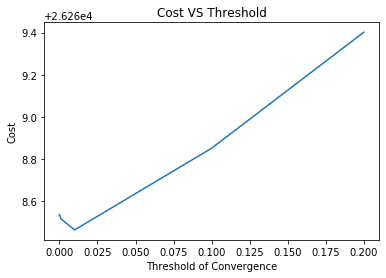

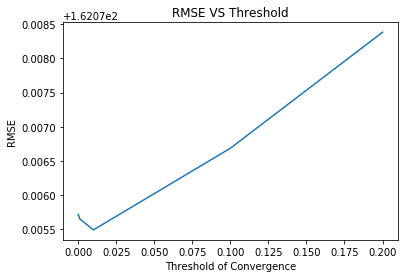

In [32]:
# plotting Cost and RMSE with respect to threshold in test set 

max_iter = 150
alpha = 0.001
# varying alpha as well to show difference without overlap of curves. 

cost_li = [] 
rmse_li = []
threshold_li = [0.2,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.0000000001]

#cost1, rmse1 = plot_threshold_test(100,alpha,max_iter)
#cost2, rmse2 = plot_threshold_test(10,alpha,max_iter)
#cost3, rmse3= plot_threshold_test(1,alpha,max_iter)
cost4, rmse4 = plot_threshold_test(0.2,alpha,max_iter)
cost5, rmse5 = plot_threshold_test(0.1,alpha,max_iter)
cost6, rmse6= plot_threshold_test(0.01,alpha,max_iter)
cost7, rmse7 = plot_threshold_test(0.001,alpha,max_iter)
cost8, rmse8 = plot_threshold_test(0.0001,alpha,max_iter)
cost9, rmse9 = plot_threshold_test(0.00001,alpha,max_iter)
cost10, rmse10 = plot_threshold_test(0.000001,alpha,max_iter)
cost11, rmse11 = plot_threshold_test(0.0000001,alpha,max_iter)
cost12, rmse12 = plot_threshold_test(0.0000000001,alpha,max_iter)
#for multiple values of threshold, multiple values of rmse and cost are returned from test set

#cost_li.append(cost1);
cost_li.append(cost4);cost_li.append(cost5);cost_li.append(cost6);cost_li.append(cost7)
cost_li.append(cost8);cost_li.append(cost9);cost_li.append(cost10);cost_li.append(cost11);cost_li.append(cost12)

#rmse_li.append(rmse1);
rmse_li.append(rmse4);rmse_li.append(rmse5);rmse_li.append(rmse6);rmse_li.append(rmse7)
rmse_li.append(rmse8);rmse_li.append(rmse9);rmse_li.append(rmse10);rmse_li.append(rmse11); rmse_li.append(rmse12)

plt.title("Cost VS Threshold")
plt.xlabel("Threshold of Convergence")
plt.ylabel("Cost")
plt.plot(threshold_li,cost_li)
plt.show()

plt.title("RMSE VS Threshold")
plt.xlabel("Threshold of Convergence")
plt.ylabel("RMSE")
plt.plot(threshold_li,rmse_li)
plt.show()


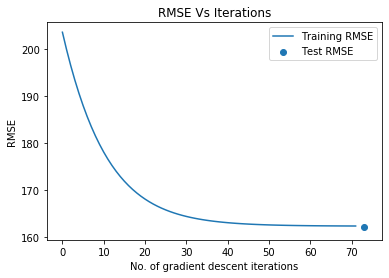

In [34]:
# threshold = 1 is best 
# for training : iter5, rmse_list5
# for test: rmse3

#iter5 = 77

plt.title("RMSE Vs Iterations")
plt.xlabel("No. of gradient descent iterations")
plt.ylabel("RMSE")
plt.plot(rmse_list5, label = 'Training RMSE')
plt.scatter(iter5,rmse3, label = 'Test RMSE')
plt.legend()
plt.show()




In [33]:
rmse3

162.09692287166706

In [35]:

def get_rand_x_y_beta_vector_train(col_list):
    #y_vector
    #=========
    y_vector=np.vstack(train['y']) 
    #.to_numpy()
    #y_vector.transpose()
    #y_vector

    #x_vector
    #=========
    #get all columns of training set except y column
    x_vector_data = train.iloc[:,col_list].to_numpy()
    #print(x_vector.shape[1]) #get number of columns

    ones=np.ones((x_vector_data.shape[0],1))

    #print(train.iloc[:,0:len(df.columns)-1].to_numpy())
    #print (x_vector_data.shape)
    #print (ones.shape)

    x_vector=np.hstack([ones,x_vector_data])
    #x_vector

    # beta vector
    #=============
    beta_vector = get_initial_beta(len(col_list)+1) # additional beta to get intercept
    #beta_vector
    
    return (x_vector,y_vector,beta_vector) 

In [36]:

def get_rand_x_y_vector_test(col_list):
    #y_vector
    #=========
    y_vector=np.vstack(test['y']) 
    #.to_numpy()
    #y_vector.transpose()
    #y_vector

    #x_vector
    #=========
    #get all columns of training set except y column
    x_vector_data = test.iloc[:,col_list].to_numpy()
    #print(x_vector.shape[1]) #get number of columns

    ones=np.ones((x_vector_data.shape[0],1))

    #print(train.iloc[:,0:len(df.columns)-1].to_numpy())
    #print (x_vector_data.shape)
    #print (ones.shape)

    x_vector=np.hstack([ones,x_vector_data])
    #x_vector
    
    return (x_vector,y_vector) 

Gradient descent algorithm has started
Completed
Completed
Minimum cost for training set for reduced model is 25798.437611439327
Minimum cost for training set for full model is 26332.563280646817
RMSE for training set for reduced model is 160.61892046530298
RMSE for training set for full model is 162.2731132401385
optimal beta for training set for reduced model is:
[[40.47071477 40.50553785 40.82559294 40.52605141 41.31955005 40.45650484
  40.95455321 40.75054887 41.27043779]]
optimal beta for training set for full model is:
[[24.5372296  24.57205268 24.89210776 24.59256623 25.38606488 24.52301966
  25.02106804 24.8170637  25.33695262 24.64452839 24.82208265 24.81866239
  24.73002935 24.48653655 24.92114179]]


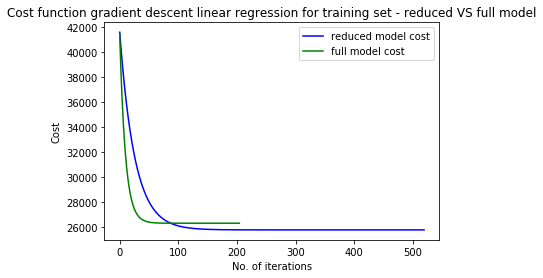

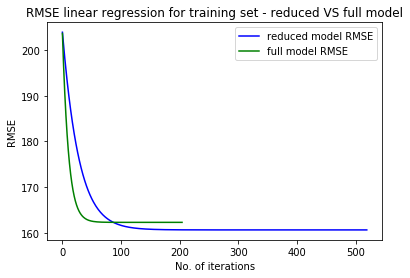

In [39]:

# Feature selection - 8 features at random
#===========================================

#m = train['y'].size  #no.of data points
max_iterations = 10000
threshold = 0.000001
alpha=0.001

# Call gradient descent linear regression algorithm on training set 
#===================================================================

#taking random column indexes
col_list = [0,1,3,4,5,7,8,10]

#Reduced model
print("Gradient descent algorithm has started")
x_vector, y_vector, beta_vector = get_rand_x_y_beta_vector_train(col_list) 
cost_list_train_1, rmse_list_train_1, optimal_beta_vector_train_1, iteration = gradient_descent_linear_reg(threshold,alpha,max_iterations,train['y'].size,x_vector,y_vector,beta_vector)

#full model
x_vector, y_vector, beta_vector = get_x_y_beta_vector_train() 
cost_list_train_2, rmse_list_train_2, optimal_beta_vector_train_2, iteration = gradient_descent_linear_reg(threshold,alpha,max_iterations,train['y'].size,x_vector,y_vector,beta_vector)


print("Minimum cost for training set for reduced model is {0}".format(cost_list_train_1[-1]))
print("Minimum cost for training set for full model is {0}".format(cost_list_train_2[-1]))
print("RMSE for training set for reduced model is {0}".format(rmse_list_train_1[-1]))
print("RMSE for training set for full model is {0}".format(rmse_list_train_2[-1]))
print("optimal beta for training set for reduced model is:")
print(optimal_beta_vector_train_1.T)
print("optimal beta for training set for full model is:")
print(optimal_beta_vector_train_2.T)
#print cost_list, RMSE, Optimal beta

#print("The training cost list is:")
#for i in range(0,len(cost_list_train)):
#    print(cost_list_train[i])

#print("Minimum cost for training set is {0}:".format(cost_list_train[-1]))
#print("RMSE for training set is {0}".format(rmse_list_train[-1]))
#print("optimal beta for training set:")
#print(optimal_beta_vector_train.T)


# plot Cost function
plt.title("Cost function gradient descent linear regression for training set - reduced VS full model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot(cost_list_train_1,'b', label = 'reduced model cost')
plt.plot(cost_list_train_2,'g', label = 'full model cost')
plt.legend()
plt.show()

# plot RMSE
plt.title("RMSE linear regression for training set - reduced VS full model")
plt.xlabel("No. of iterations")
plt.ylabel("RMSE")
plt.plot(rmse_list_train_1,'b', label = 'reduced model RMSE')
plt.plot(rmse_list_train_2,'g', label = 'full model RMSE')
plt.legend()
plt.show()



In [40]:
# calculate y predicted values using the optimal beta vector obtained from training set - for test set 
#======================================================================================================

m=test['y'].size
x_vector, y_vector = get_rand_x_y_vector_test(col_list) 

y_pred_test = np.matmul(x_vector,optimal_beta_vector_train_1)
sum_sq_test = np.sum(np.square(y_pred_test - y_vector))
cost_fn_test = sum_sq_test/(2*m)            # calculating cost function
rmse_test = np.sqrt(cost_fn_test)

print("Estimated reduced model test cost is {0}".format(cost_fn_test))
print("Estimated reduced model test RMSE is {0}".format(rmse_test))

m=test['y'].size
x_vector, y_vector = get_x_y_vector_test() 

y_pred_test = np.matmul(x_vector,optimal_beta_vector_train_2)
sum_sq_test = np.sum(np.square(y_pred_test - y_vector))
cost_fn_test = sum_sq_test/(2*m)            # calculating cost function
rmse_test = np.sqrt(cost_fn_test)

print("Estimated full model test cost is {0}".format(cost_fn_test))
print("Estimated full model test RMSE is {0}".format(rmse_test))



Estimated reduced model test cost is 25709.07471043754
Estimated reduced model test RMSE is 160.34049616499738
Estimated full model test cost is 26268.567359844
Estimated full model test RMSE is 162.07580744776192


In [22]:
# Feature selection - Selecting 8 best features
#===============================================
len(y_vector)

72480

In [41]:
def get_x_y_beta_vector_train_logistic(cut_off):
    #y_vector
    #=========
    train_logistic = train.copy()
    #cut_off = 0.5 #round(df['y'].mean(),3)    # get median value from dataframe (train + test combined)
    
    # assumption: the rows that have y < cut_off have value 0. 
    train_logistic['y'] = train_logistic['y'].apply(lambda x: 1 if x>cut_off else 0 ) 
    y_vector=np.vstack(train_logistic['y']) 
    #.to_numpy()
    #y_vector.transpose()
    #y_vector

    #x_vector
    #=========
    #get all columns of training set except y column
    x_vector_data = train_logistic.iloc[:,0:len(train_logistic.columns)-1].to_numpy()
    #print(x_vector.shape[1]) #get number of columns

    ones=np.ones((x_vector_data.shape[0],1))

    #print(train.iloc[:,0:len(df.columns)-1].to_numpy())
    #print (x_vector_data.shape)
    #print (ones.shape)

    x_vector=np.hstack([ones,x_vector_data])
    #x_vector

    # beta vector
    #=============
    beta_vector = get_initial_beta(len(train_logistic.columns)) # additional beta to get intercept
    #beta_vector
    
    return (x_vector,y_vector,beta_vector) 

In [42]:
def get_x_y_vector_test_logistic(cut_off):
    #y_vector
    #=========
    test_logistic = test.copy()
    #cut_off = 0.5 #round(df['y'].mean(),3)
    
    test_logistic['y'] = test_logistic['y'].apply(lambda x: 1 if x>cut_off else 0 ) 
    y_vector=np.vstack(test_logistic['y']) 
    #.to_numpy()
    #y_vector.transpose()
    #y_vector

    #x_vector
    #=========
    #get all columns of training set except y column
    x_vector_data = test_logistic.iloc[:,0:len(test_logistic.columns)-1].to_numpy()
    #print(x_vector.shape[1]) #get number of columns

    ones=np.ones((x_vector_data.shape[0],1))

    #print(train.iloc[:,0:len(df.columns)-1].to_numpy())
    #print (x_vector_data.shape)
    #print (ones.shape)

    x_vector=np.hstack([ones,x_vector_data])
    #x_vector
    
    return (x_vector,y_vector) 

In [43]:
# gradient descent logistic regression
#=====================================
def gradient_descent_logistic_reg(cut_off, threshold,alpha,max_iterations,m,x_vector_1,y_vector_1,beta_vector_1):
    cost_list=[]
    it = 0
    for i in range(1,max_iterations+1):
        it +=1
        y_pred_1 = 1/(1+np.exp(-1*(x_vector_1.dot(beta_vector_1)))) 
        sum_y = np.sum(y_vector_1.T.dot(np.log(y_pred_1)) + (1-y_vector_1).T.dot(np.log(1-y_pred_1)) )
        cost_fn = (-1*sum_y)/m            # calculating cost function
        if len(cost_list)>1:
            if (cost_fn < cost_list[-1] ): # if cost increases, we have gone past minimum. SO cut off
                if (cost_list[-1] - cost_fn < threshold):
                    break
            else:    
                break
        cost_list.append(cost_fn)       
        partial_diff = x_vector_1.T.dot(y_pred_1 - y_vector_1)  # same as partial_diff = np.matmul(x_vector.T, (y_pred-y_vector))
        beta_vector_1 = beta_vector_1 - alpha*(1/m)*(partial_diff) 
        #print(beta_vector.T)
    
    #cut_off = 0.5 #round(df['y'].mean(),3)  # defining cut off
    for i in range(0,len(y_pred_1)):     # convert predicted probabilities to 0 or 1 based on cut off
        if y_pred_1[i]>cut_off:
            y_pred_1[i] = 1
        else:
            y_pred_1[i] = 0    
    print("Completed")    
    return (cost_list, y_pred_1, beta_vector_1, it) 

In [47]:
df['y'].mean()
round(df['y'].mean())

176

In [45]:
def get_accuracy(actual_y, predicted_y):
    correct = 0
    for i in range (0,len(actual_y)):
        if actual_y[i] == predicted_y[i]:
            correct+=1
    accuracy =  correct/len(actual_y)      
    return  (accuracy)       
    

In [46]:
threshold = 0.000001
alpha = 0.001
max_iterations = 10000

# assuming median value as cut off value for target y
cut_off_value = round(df['y'].mean()) #for initializing x,y,beta vectors = to get y
cut_off_probability = 0.5  # to pass to the algorithm logit = to get y_hat

# Call gradient descent logistic regression algorithm on training set 
#=====================================================================
x_vector, y_vector, beta_vector = get_x_y_beta_vector_train_logistic(cut_off_value) 
print("Gradient descent algorithm is running ...")
cost_list_train, y_predicted_train, optimal_beta_vector_train, iteration = gradient_descent_logistic_reg(cut_off_probability,threshold,alpha,max_iterations,train['y'].size,x_vector,y_vector,beta_vector)

print("The training cost list is:")
for i in range(0,len(cost_list_train)):
    print(cost_list_train[i])

#print("RMSE for training set is {0}".format(rmse_list_train[-1]))
print("Minimum Cost is: {0}".format(cost_list_train[-1]))
print("optimal beta for training set:")
print(optimal_beta_vector_train.T)
print("Predicted output:")
print(y_predicted_train.T)
#for i  in range (0,len(y_predicted_train_1)):
#    print(y_predicted_train[i])

accuracy_train = get_accuracy(y_vector, y_predicted_train)
print("Accuracy of train set is : {0}".format(accuracy_train))


Gradient descent algorithm is running ...
Completed
The training cost list is:
1.5812298120274009
1.5799810153769562
1.5787331462769665
1.5774862054814485
1.5762401937427277
1.5749951118114291
1.573750960436473
1.572507740365065
1.5712654523426923
1.5700240971131116
1.5687836754183475
1.5675441879986822
1.5663056355926475
1.5650680189370214
1.5638313387668168
1.5625955958152782
1.561360790813871
1.5601269244922784
1.5588939975783909
1.557662010798301
1.5564309648762953
1.555200860534849
1.5539716984946164
1.5527434794744268
1.5515162041912751
1.5502898733603163
1.5490644876948574
1.547840047906351
1.5466165547043889
1.5453940087966946
1.5441724108891153
1.5429517616856177
1.5417320618882775
1.540513312197276
1.5392955133108912
1.5380786659254906
1.5368627707355254
1.5356478284335242
1.5344338397100836
1.5332208052538638
1.5320087257515813
1.5307976018880018
1.5295874343459324
1.528378223806216
1.527169970947725
1.5259626764473528
1.5247563409800093
1.5235509652186119
1.5223465498340796

In [48]:
cut_off_probability = 0.5
cut_off_value = round(df['y'].mean())

# calculate y predicted values using the optimal beta vector obtained from training set 
#=======================================================================================
m=test['y'].size
x_vector, y_vector = get_x_y_vector_test_logistic(cut_off_value) 

y_pred_test = 1/(1+np.exp(-1*(x_vector.dot(optimal_beta_vector_train)))) 
sum_y = np.sum(y_vector.T.dot(np.log(y_pred_test)) + (1-y_vector).T.dot(np.log(1-y_pred_test)) )
cost_fn_test = (-1*sum_y)/m            # calculating cost function

for i in range(0,len(y_pred_test)):     # convert predicted probabilities to 0 or 1 based on cut off
    if y_pred_test[i]>cut_off_probability:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0 
            
#print(y_pred_test)
print("Estimated test cost is {0}".format(cost_fn_test))

accuracy_test = get_accuracy(y_vector, y_pred_test)
print("Accuracy of test set is : {0}".format(accuracy_test))


Estimated test cost is 0.5407524816341066
Accuracy of test set is : 0.7247584796558776


In [49]:
def plot_alpha_logistic(cut_off_value, cut_off, threshold, alpha, max_iter):
    print("Alpha = {0}".format(alpha))
    m=test['y'].size
    x_vector, y_vector, beta_vector = get_x_y_beta_vector_train_logistic(cut_off_value)
    cost_list_train, y_predicted_train, optimal_beta_vector_train, iteration = gradient_descent_logistic_reg(cut_off,threshold,alpha,max_iter,train['y'].size,x_vector,y_vector,beta_vector)
        
    print("Minimum cost for training set is {0}:".format(cost_list_train[-1]))
    
    x_vector, y_vector = get_x_y_vector_test_logistic(cut_off_value) 
    y_pred_test = 1/(1+np.exp(-1*(x_vector.dot(optimal_beta_vector_train)))) 
    sum_y = np.sum(y_vector.T.dot(np.log(y_pred_test)) + (1-y_vector).T.dot(np.log(1-y_pred_test)) )
    cost_fn_test = (-1*sum_y)/m            # calculating cost function
    
    y_pred_test_orig = y_pred_test.copy()

    for i in range(0,len(y_pred_test)):     # convert predicted probabilities to 0 or 1 based on cut off
        if y_pred_test[i]>cut_off:
            y_pred_test[i] = 1
        else:
            y_pred_test[i] = 0 

    #print(y_pred_test)
    print("Estimated test cost is {0}".format(cost_fn_test))

    accuracy_test = get_accuracy(y_vector, y_pred_test)
    print("Accuracy of test set is : {0}".format(accuracy_test))
    
    #return (cost_list_train, y_pred_test, y_vector, y_pred_test_orig)
    return (cost_list_train, iteration)
    

In [50]:
def get_metrics(y_predicted, y_actual):
    TN=0;TP=0;FN=0;FP=0;TPR=0;FPR=0;
    for i in range (0,len(y_predicted)):
        if y_predicted[i]==y_actual[i]:
            if y_predicted[i] == 0:
                TN +=1
            else:
                TP +=1
        elif y_predicted[i]==0:
            FN +=1
        else:
            FP+=1
    
    TPR = TP/(FN+TP)
    FPR = FP/(TN+FP)
    return(TPR,FPR)

Alpha = 0.015
Completed
Minimum cost for training set is 0.5876550002260522:
Estimated test cost is 0.5873151102904739
Accuracy of test set is : 0.7041393413722586
Alpha = 0.01
Completed
Minimum cost for training set is 0.6104572273728199:
Estimated test cost is 0.6101648252453302
Accuracy of test set is : 0.6910655101896904
Alpha = 0.005
Completed
Minimum cost for training set is 0.6772321904827098:
Estimated test cost is 0.6765567915131914
Accuracy of test set is : 0.5771102178971864
Alpha = 0.003
Completed
Minimum cost for training set is 0.8053896927968451:
Estimated test cost is 0.8042107626201335
Accuracy of test set is : 0.4033848106621536
Alpha = 0.001
Completed
Minimum cost for training set is 1.2057271690010811:
Estimated test cost is 1.2047264032287532
Accuracy of test set is : 0.2969325153374233
Alpha = 0.0005
Completed
Minimum cost for training set is 1.3779602413636158:
Estimated test cost is 1.377386048654723
Accuracy of test set is : 0.29436570058529016
Alpha = 0.0001
C

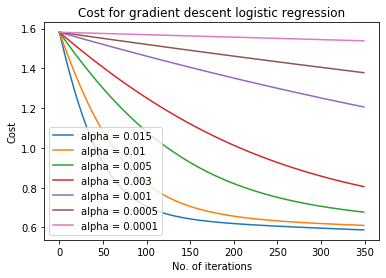

Time taken to execute for alpha = 0.015 is 7.962771654129028. Iterations is 350
Time taken to execute for alpha = 0.01 is 7.714960098266602. Iterations is 350
Time taken to execute for alpha = 0.005 is 7.65729832649231. Iterations is 350
Time taken to execute for alpha = 0.003 is 8.367680311203003. Iterations is 350
Time taken to execute for alpha = 0.001 is 7.6765382289886475. Iterations is 350
Time taken to execute for alpha = 0.0005 is 7.626516103744507. Iterations is 350
Time taken to execute for alpha = 0.0001 is 6.297686576843262. Iterations is 350


In [51]:
# get optimal alpha 
#====================
# experiment with multiple alpha - logistic regression
#=====================================================

max_iter = 350
threshold = 0.000001
cut_off = 0.5
cut_off_value = round(df['y'].mean())

start_time_1 = time.time()
cost_list1, iter1 = plot_alpha_logistic(cut_off_value,cut_off,threshold,0.015,max_iter)
end_time_1 = time.time()

start_time_2 = time.time()
cost_list2, iter2 = plot_alpha_logistic(cut_off_value,cut_off,threshold,0.01,max_iter)
end_time_2 = time.time()

start_time_3 = time.time()
cost_list3, iter3 = plot_alpha_logistic(cut_off_value,cut_off,threshold,0.005,max_iter)
end_time_3 = time.time()

start_time_4 = time.time()
cost_list4, iter4 = plot_alpha_logistic(cut_off_value,cut_off,threshold,0.003,max_iter)
end_time_4 = time.time()

start_time_5 = time.time()
cost_list5, iter5 = plot_alpha_logistic(cut_off_value,cut_off,threshold,0.001,max_iter)
end_time_5 = time.time()

start_time_6 = time.time()
cost_list6, iter6 = plot_alpha_logistic(cut_off_value,cut_off,threshold,0.0005,max_iter)
end_time_6 = time.time()

start_time_7 = time.time()
cost_list7, iter7 = plot_alpha_logistic(cut_off_value,cut_off,threshold,0.0001,max_iter)
end_time_7 = time.time()

#Plot cost
plt.title("Cost for gradient descent logistic regression")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot(cost_list1, label = 'alpha = 0.015')
plt.plot(cost_list2, label = 'alpha = 0.01')
plt.plot(cost_list3, label = 'alpha = 0.005')
plt.plot(cost_list4, label = 'alpha = 0.003')
plt.plot(cost_list5, label = 'alpha = 0.001')
plt.plot(cost_list6, label = 'alpha = 0.0005')
plt.plot(cost_list7, label = 'alpha = 0.0001')
plt.legend()
plt.show()


print("Time taken to execute for alpha = 0.015 is {0}. Iterations is {1}".format((end_time_1-start_time_1),iter1))
print("Time taken to execute for alpha = 0.01 is {0}. Iterations is {1}".format((end_time_2-start_time_2),iter2))
print("Time taken to execute for alpha = 0.005 is {0}. Iterations is {1}".format((end_time_3-start_time_3),iter3))
print("Time taken to execute for alpha = 0.003 is {0}. Iterations is {1}".format((end_time_4-start_time_4),iter4))
print("Time taken to execute for alpha = 0.001 is {0}. Iterations is {1}".format((end_time_5-start_time_5),iter5))
print("Time taken to execute for alpha = 0.0005 is {0}. Iterations is {1}".format((end_time_6-start_time_6),iter6))
print("Time taken to execute for alpha = 0.0001 is {0}. Iterations is {1}".format((end_time_7-start_time_7),iter7))



In [53]:
# get optimal alpha 
#====================
# experiment with multiple alpha - logistic regression
#=====================================================

max_iter = 10000
threshold = 0.00001
cut_off = 0.5
cut_off_value = round(df['y'].mean())

start_time_1 = time.time()
cost_list1, iter1 = plot_alpha_logistic(cut_off_value,cut_off,threshold,20,max_iter)
end_time_1 = time.time()

start_time_2 = time.time()
cost_list2, iter2 = plot_alpha_logistic(cut_off_value,cut_off,threshold,10,max_iter)
end_time_2 = time.time()

start_time_3 = time.time()
cost_list3, iter3 = plot_alpha_logistic(cut_off_value,cut_off,threshold,5,max_iter)
end_time_3 = time.time()

start_time_9 = time.time()
cost_list3_4, iter3_4 = plot_alpha_logistic(cut_off_value,cut_off,threshold,3,max_iter)
end_time_9 = time.time()

start_time_8 = time.time()
cost_list3_5, iter3_5 = plot_alpha_logistic(cut_off_value,cut_off,threshold,2.5,max_iter)
end_time_8 = time.time()

start_time_4 = time.time()
cost_list4, iter4 = plot_alpha_logistic(cut_off_value,cut_off,threshold,2,max_iter)
end_time_4 = time.time()

start_time_5 = time.time()
cost_list5, iter5 = plot_alpha_logistic(cut_off_value,cut_off,threshold,1.5,max_iter)
end_time_5 = time.time()

start_time_6 = time.time()
cost_list6, iter6 = plot_alpha_logistic(cut_off_value,cut_off,threshold,1,max_iter)
end_time_6 = time.time()

start_time_7 = time.time()
cost_list7, iter7 = plot_alpha_logistic(cut_off_value,cut_off,threshold,0.1,max_iter)
end_time_7 = time.time()


print("Time taken to execute for alpha = 20 is {0}. Iterations is {1}".format((end_time_1-start_time_1),iter1))
print("Time taken to execute for alpha = 10 is {0}. Iterations is {1}".format((end_time_2-start_time_2),iter2))
print("Time taken to execute for alpha = 5 is {0}. Iterations is {1}".format((end_time_3-start_time_3),iter3))
print("Time taken to execute for alpha = 3 is {0}. Iterations is {1}".format((end_time_9-start_time_9),iter3_4))
print("Time taken to execute for alpha = 2.5 is {0}. Iterations is {1}".format((end_time_8-start_time_8),iter3_5))
print("Time taken to execute for alpha = 2 is {0}. Iterations is {1}".format((end_time_4-start_time_4),iter4))
print("Time taken to execute for alpha = 1.5 is {0}. Iterations is {1}".format((end_time_5-start_time_5),iter5))
print("Time taken to execute for alpha = 1 is {0}. Iterations is {1}".format((end_time_6-start_time_6),iter6))
print("Time taken to execute for alpha = 0.1 is {0}. Iterations is {1}".format((end_time_7-start_time_7),iter7))



Alpha = 20
Completed
Minimum cost for training set is 2.1824792404161175:
Estimated test cost is 11.071027938951683
Accuracy of test set is : 0.7058740568366124
Alpha = 10
Completed
Minimum cost for training set is 1.8050870016511436:
Estimated test cost is 5.461449127320601
Accuracy of test set is : 0.7058740568366124
Alpha = 5
Completed
Minimum cost for training set is 0.8866979882682688:
Estimated test cost is 1.1605012233461822
Accuracy of test set is : 0.3200902616176574
Alpha = 3
Completed
Minimum cost for training set is 0.5426342871129474:
Estimated test cost is 0.555982367860679
Accuracy of test set is : 0.7109794795853607
Alpha = 2.5
Completed
Minimum cost for training set is 0.21532545216323276:
Estimated test cost is 0.21567075767806987
Accuracy of test set is : 0.9210210845497496
Alpha = 2
Completed
Minimum cost for training set is 0.21588426110357178:
Estimated test cost is 0.21622502883999412
Accuracy of test set is : 0.9209223609054369
Alpha = 1.5
Completed
Minimum cost

In [79]:
def plot_cut_off(cut_off_value, cut_off, threshold, alpha, max_iter):
    print("Training - Cut Off Probability = {0}".format(cut_off))
    x_vector, y_vector, beta_vector = get_x_y_beta_vector_train_logistic(cut_off_value)
    cost_list_train, y_predicted_train, optimal_beta_vector_train, iteration = gradient_descent_logistic_reg(cut_off,threshold,alpha,max_iter,train['y'].size,x_vector,y_vector,beta_vector)
    
    print("Minimum cost for train set {0}".format(cost_list_train[-1]))
    accuracy_train = get_accuracy(y_vector, y_predicted_train)
    print("Accuracy of train set is : {0}".format(accuracy_train))
    
    m=test['y'].size
    x_vector, y_vector = get_x_y_vector_test_logistic(cut_off_value) 

    y_pred_test = 1/(1+np.exp(-1*(x_vector.dot(optimal_beta_vector_train)))) 
    sum_y = np.sum(y_vector.T.dot(np.log(y_pred_test)) + (1-y_vector).T.dot(np.log(1-y_pred_test)) )
    cost_fn_test = (-1*sum_y)/m            # calculating cost function

    for i in range(0,len(y_pred_test)):     # convert predicted probabilities to 0 or 1 based on cut off
        if y_pred_test[i]>cut_off:
            y_pred_test[i] = 1
        else:
            y_pred_test[i] = 0 
            
    #print(y_pred_test)
    print("Estimated test cost is {0}".format(cost_fn_test))

    accuracy_test = get_accuracy(y_vector, y_pred_test)
    print("Accuracy of test set is : {0}".format(accuracy_test))
    
    return(accuracy_train,accuracy_test)
       

Training - Cut Off Probability = 1
Completed
Minimum cost for train set 1.391549143413131
Accuracy of train set is : 0.7381149479659413
Estimated test cost is 1.3959747167274712
Accuracy of test set is : 0.7413631346578367
Training - Cut Off Probability = 0.8
Completed
Minimum cost for train set 1.391549143413131
Accuracy of train set is : 0.4411305581835383
Estimated test cost is 1.3959747167274712
Accuracy of test set is : 0.438962472406181
Training - Cut Off Probability = 0.5
Completed
Minimum cost for train set 1.391549143413131
Accuracy of train set is : 0.26242313150425733
Estimated test cost is 1.3959747167274712
Accuracy of test set is : 0.25921633554083884
Training - Cut Off Probability = 0.3
Completed
Minimum cost for train set 1.391549143413131
Accuracy of train set is : 0.26188505203405865
Estimated test cost is 1.3959747167274712
Accuracy of test set is : 0.25863686534216335
Training - Cut Off Probability = 0.1
Completed
Minimum cost for train set 1.391549143413131
Accurac

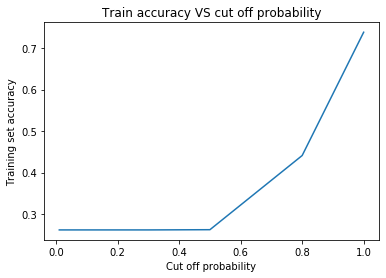

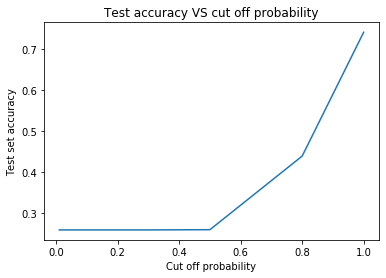

In [80]:
# Optimal cut off value
#=======================
# experiment with multiple cut off probabilities - logistic regression
#======================================================================

max_iter = 200
threshold = 0.000001
alpha = 0.001
cut_off_value = round(df['y'].mean())

acc_train=[]
acc_test = []
cut_off_arr = [1,0.8,0.5,0.3,0.1,0.01]

atrain1, atest1 =  plot_cut_off(cut_off_value,1,threshold,alpha,max_iter)
atrain2, atest2 =  plot_cut_off(cut_off_value,0.8,threshold,alpha,max_iter)
atrain3, atest3 =  plot_cut_off(cut_off_value,0.5,threshold,alpha,max_iter)
atrain4, atest4 =  plot_cut_off(cut_off_value,0.3,threshold,alpha,max_iter)
atrain5, atest5 =  plot_cut_off(cut_off_value,0.1,threshold,alpha,max_iter)
atrain6, atest6 =  plot_cut_off(cut_off_value,0.01,threshold,alpha,max_iter)

acc_train.append(atrain1);acc_train.append(atrain2);acc_train.append(atrain3);acc_train.append(atrain4);
acc_train.append(atrain5);acc_train.append(atrain6);

acc_test.append(atest1);acc_test.append(atest2);acc_test.append(atest3);acc_test.append(atest4);
acc_test.append(atest5);acc_test.append(atest6);


plt.title("Train accuracy VS cut off probability")
plt.xlabel("Cut off probability")
plt.ylabel("Training set accuracy")
plt.plot(cut_off_arr, acc_train)
plt.show()


plt.title("Test accuracy VS cut off probability")
plt.xlabel("Cut off probability")
plt.ylabel("Test set accuracy")
plt.plot(cut_off_arr, acc_test)
plt.show()


In [81]:
def plot_threshold_logistic(cut_off_value,cut_off,threshold,alpha, max_iter):
    print("Training - Threshold = {0}".format(threshold))
    x_vector, y_vector, beta_vector = get_x_y_beta_vector_train_logistic(cut_off_value)
    cost_list_train, y_predicted_train, optimal_beta_vector_train, iteration = gradient_descent_logistic_reg(cut_off,threshold,alpha,max_iter,train['y'].size,x_vector,y_vector,beta_vector)
    
    print("Minimum cost for train set {0}".format(cost_list_train[-1]))
    accuracy_train = get_accuracy(y_vector, y_predicted_train)
    print("Accuracy of train set is : {0}".format(accuracy_train))
    
    m=test['y'].size
    x_vector, y_vector = get_x_y_vector_test_logistic(cut_off_value) 

    y_pred_test = 1/(1+np.exp(-1*(x_vector.dot(optimal_beta_vector_train)))) 
    sum_y = np.sum(y_vector.T.dot(np.log(y_pred_test)) + (1-y_vector).T.dot(np.log(1-y_pred_test)) )
    cost_fn_test = (-1*sum_y)/m            # calculating cost function

    for i in range(0,len(y_pred_test)):     # convert predicted probabilities to 0 or 1 based on cut off
        if y_pred_test[i]>cut_off:
            y_pred_test[i] = 1
        else:
            y_pred_test[i] = 0 
            
    #print(y_pred_test)
    print("Estimated test cost is {0}".format(cost_fn_test))

    accuracy_test = get_accuracy(y_vector, y_pred_test)
    print("Accuracy of test set is : {0}".format(accuracy_test))
    
    return(accuracy_train,accuracy_test, iteration)


In [86]:
# experiment with multiple threshold of convergence - logistic regression
#========================================================================

max_iter = 10000
alpha = 0.001
cut_off = 0.5
cut_off_value = round(df['y'].mean())

atrain = []
atest = []
#athreshold = [0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000001, 0.0000001, 0.00000001]

start_time_7 = time.time()
accuracy_train1,accuracy_test1,iter1 = plot_threshold_logistic(cut_off_value,cut_off,0.01,alpha,max_iter)
end_time_7 = time.time()

start_time_8 = time.time()
accuracy_train2,accuracy_test2,iter2  = plot_threshold_logistic(cut_off_value,cut_off,0.005,alpha,max_iter)
end_time_8 = time.time()

start_time_9 = time.time()
accuracy_train3,accuracy_test3,iter3 = plot_threshold_logistic(cut_off_value,cut_off,0.001,alpha,max_iter)
end_time_9 = time.time()

start_time_10 = time.time()
accuracy_train4,accuracy_test4,iter4 = plot_threshold_logistic(cut_off_value,cut_off,0.0005,alpha,max_iter)
end_time_10 = time.time()

start_time_11 = time.time()
accuracy_train5,accuracy_test5,iter5 = plot_threshold_logistic(cut_off_value,cut_off,0.0001,alpha,max_iter)
end_time_11 = time.time()

start_time_12 = time.time()
accuracy_train6,accuracy_test6,iter6  = plot_threshold_logistic(cut_off_value,cut_off,0.00005,alpha,max_iter)
end_time_12 = time.time()

start_time_13 = time.time()
accuracy_train7,accuracy_test7,iter7 = plot_threshold_logistic(cut_off_value,cut_off,0.00001,alpha,max_iter)
end_time_13 = time.time()

start_time_14 = time.time()
accuracy_train8,accuracy_test8,iter8 = plot_threshold_logistic(cut_off_value,cut_off,0.000001,alpha,max_iter)
end_time_14 = time.time()

start_time_15 = time.time()
accuracy_train9,accuracy_test9,iter9 = plot_threshold_logistic(cut_off_value,cut_off,0.0000001,alpha,max_iter)
end_time_15 = time.time()

start_time_16 = time.time()
accuracy_train10,accuracy_test10,iter10 = plot_threshold_logistic(cut_off_value,cut_off,0.00000001,alpha,max_iter)
end_time_16 = time.time()


print("Time taken to execute for threshold = 0.01 is {0}. Iterations is {1}".format((end_time_7-start_time_7), iter1))
print("Time taken to execute for threshold = 0.005 is {0}. Iterations is {1}".format((end_time_8-start_time_8), iter2))
print("Time taken to execute for threshold = 0.001 is {0}. Iterations is {1}".format((end_time_9-start_time_9), iter3))
print("Time taken to execute for threshold = 0.0005 is {0}. Iterations is {1}".format((end_time_10-start_time_10), iter4))
print("Time taken to execute for threshold = 0.0001 is {0}. Iterations is {1}".format((end_time_11-start_time_11), iter5))
print("Time taken to execute for threshold = 0.00005 is {0}. Iterations is {1}".format((end_time_12-start_time_12), iter6))
print("Time taken to execute for threshold = 0.00001 is {0}. Iterations is {1}".format((end_time_13-start_time_13), iter7))
print("Time taken to execute for threshold = 0.000001 is {0}. Iterations is {1}".format((end_time_14-start_time_14), iter8))
print("Time taken to execute for threshold = 0.000001 is {0}. Iterations is {1}".format((end_time_15-start_time_15), iter9))
print("Time taken to execute for threshold = 0.000001 is {0}. Iterations is {1}".format((end_time_16-start_time_16), iter10))


Training - Threshold = 0.01
Completed
Minimum cost for train set 1.6473752560804595
Accuracy of train set is : 0.26188505203405865
Estimated test cost is 1.6534455608691947
Accuracy of test set is : 0.25863686534216335
Training - Threshold = 0.005
Completed
Minimum cost for train set 1.6473752560804595
Accuracy of train set is : 0.26188505203405865
Estimated test cost is 1.6534455608691947
Accuracy of test set is : 0.25863686534216335
Training - Threshold = 0.001
Completed
Minimum cost for train set 1.2314012213884953
Accuracy of train set is : 0.2656516083254494
Estimated test cost is 1.2347561310714472
Accuracy of test set is : 0.26225165562913905
Training - Threshold = 0.0005
Completed
Minimum cost for train set 0.8851322109933739
Accuracy of train set is : 0.3427093188268685
Estimated test cost is 0.8858619874656722
Accuracy of test set is : 0.34216335540838855
Training - Threshold = 0.0001
Completed
Minimum cost for train set 0.6536892075937129
Accuracy of train set is : 0.6230842

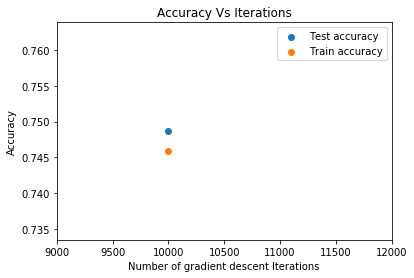

In [89]:
plt.title("Accuracy Vs Iterations")
plt.xlabel("Number of gradient descent Iterations")
plt.ylabel("Accuracy")
plt.xlim(9000,12000)
plt.scatter(iter8, accuracy_test8, label = "Test accuracy")
plt.scatter(iter8, accuracy_train8, label = "Train accuracy")
plt.legend()
plt.show()


In [88]:
iter8

10000

In [96]:
def get_rand_x_y_beta_vector_train_logistic(cut_off, col_list):
    #y_vector
    #=========
    train_logistic = train.copy()
    #cut_off = 0.5 #round(df['y'].mean(),3)    # get median value from dataframe (train + test combined)
    
    # assumption: the rows that have y < cut_off have value 0. 
    train_logistic['y'] = train_logistic['y'].apply(lambda x: 1 if x>cut_off else 0 ) 
    y_vector=np.vstack(train_logistic['y']) 
    #.to_numpy()
    #y_vector.transpose()
    #y_vector

    #x_vector
    #=========
    #get all columns of training set except y column
    x_vector_data = train_logistic.iloc[:,col_list].to_numpy()
    #print(x_vector.shape[1]) #get number of columns

    ones=np.ones((x_vector_data.shape[0],1))

    #print(train.iloc[:,0:len(df.columns)-1].to_numpy())
    #print (x_vector_data.shape)
    #print (ones.shape)

    x_vector=np.hstack([ones,x_vector_data])
    #x_vector

    # beta vector
    #=============
    beta_vector = get_initial_beta(len(col_list)+1) # additional beta to get intercept
    #beta_vector
    
    return (x_vector,y_vector,beta_vector) 

In [97]:
def get_rand_x_y_vector_test_logistic(cut_off, col_list):
    #y_vector
    #=========
    test_logistic = test.copy()
    #cut_off = 0.5 #round(df['y'].mean(),3)
    
    test_logistic['y'] = test_logistic['y'].apply(lambda x: 1 if x>cut_off else 0 ) 
    y_vector=np.vstack(test_logistic['y']) 
    #.to_numpy()
    #y_vector.transpose()
    #y_vector

    #x_vector
    #=========
    #get all columns of training set except y column
    x_vector_data = test_logistic.iloc[:,col_list].to_numpy()
    #print(x_vector.shape[1]) #get number of columns

    ones=np.ones((x_vector_data.shape[0],1))

    #print(train.iloc[:,0:len(df.columns)-1].to_numpy())
    #print (x_vector_data.shape)
    #print (ones.shape)

    x_vector=np.hstack([ones,x_vector_data])
    #x_vector

    
    return (x_vector,y_vector) 

Gradient descent algorithm has started
Completed
Completed
Minimum Cost for training set for reduced model is 0.5459173985560366
Minimum Cost for training set for full model is 0.5164415188883554
Accuracy of train set for reduced model is : 0.7381149479659413
Accuracy of train set for full model is : 0.7458668401135289
optimal beta for training set for reduced model is :
[[-0.92478173  0.1513592  -0.26153986 -0.38454548  0.38055052 -0.27461845
   0.52314075 -0.1516487   0.01739949]]
optimal beta for training set for full model is :
[[-0.83093083  0.24473746  0.41072792 -0.42246985  0.24804428 -0.40032087
   0.10563095 -0.03489148  0.11792476  0.22010951  0.29588077 -0.11585188
  -0.1430964  -0.48988988 -0.19474538]]


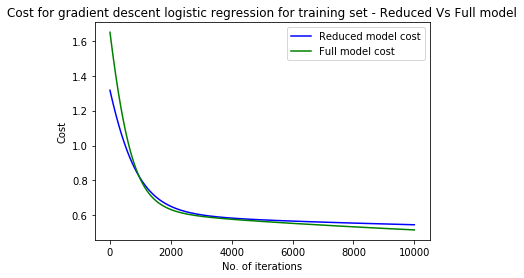

In [100]:
# Feature selection - 8 features at random
#===========================================

max_iter = 10000
cut_off = 0.5
alpha = 0.001
threshold = 0.000001
cut_off_value = round(df['y'].mean())

#taking random column indexes
col_list = [1,2,4,5,6,8,10,13]

# calling gradient descent logistic regression algorithm on train set
#===================================================================
print("Gradient descent algorithm has started")

#Reduced model
x_vector, y_vector_1, beta_vector = get_rand_x_y_beta_vector_train_logistic(cut_off_value, col_list) 
cost_list_train_1, y_predicted_train_1, optimal_beta_vector_train_1,iteration = gradient_descent_logistic_reg(cut_off,threshold,alpha,max_iterations,train['y'].size,x_vector,y_vector_1,beta_vector)

#Full model
x_vector, y_vector_2, beta_vector = get_x_y_beta_vector_train_logistic(cut_off_value) 
cost_list_train_2, y_predicted_train_2, optimal_beta_vector_train_2, iteration = gradient_descent_logistic_reg(cut_off,threshold,alpha,max_iterations,train['y'].size,x_vector,y_vector_2,beta_vector)


print("Minimum Cost for training set for reduced model is {0}".format(cost_list_train_1[-1]))
print("Minimum Cost for training set for full model is {0}".format(cost_list_train_2[-1]))
accuracy_train_1 = get_accuracy(y_vector_1, y_predicted_train_1)
print("Accuracy of train set for reduced model is : {0}".format(accuracy_train_1))
accuracy_train_2 = get_accuracy(y_vector_2, y_predicted_train_2)
print("Accuracy of train set for full model is : {0}".format(accuracy_train_2))
print("optimal beta for training set for reduced model is :")
print(optimal_beta_vector_train_1.T)
print("optimal beta for training set for full model is :")
print(optimal_beta_vector_train_2.T)


# plot Cost function
plt.title("Cost for gradient descent logistic regression for training set - Reduced Vs Full model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot(cost_list_train_1,'b', label = 'Reduced model cost')
plt.plot(cost_list_train_2,'g', label = 'Full model cost')
plt.legend()
plt.show()




In [101]:

# calculate y predicted values using the optimal beta vector obtained from training set - for test set 
#======================================================================================================
max_iter = 10000
cut_off = 0.5
alpha = 0.001
threshold = 0.000001
cut_off_value = round(df['y'].mean())

#taking random column indexes
col_list = [1,2,4,5,6,8,10,13]

print("Gradient descent algorithm has started")

#Reduced Model
#==============

m=test['y'].size
x_vector, y_vector = get_rand_x_y_vector_test_logistic(cut_off_value,col_list) 

y_pred_test = 1/(1+np.exp(-1*(x_vector.dot(optimal_beta_vector_train_1)))) 
sum_y = np.sum(y_vector.T.dot(np.log(y_pred_test)) + (1-y_vector).T.dot(np.log(1-y_pred_test)) )
cost_fn_test = (-1*sum_y)/m            # calculating cost function

for i in range(0,len(y_pred_test)):     # convert predicted probabilities to 0 or 1 based on cut off
    if y_pred_test[i]>cut_off:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0 

print("Estimated test cost for reduced model is {0}".format(cost_fn_test))

accuracy_test = get_accuracy(y_vector, y_pred_test)
print("Accuracy of test set for reduced model is : {0}".format(accuracy_test))


#Full model
#=============

m=test['y'].size
x_vector, y_vector = get_x_y_vector_test_logistic(cut_off_value) 

y_pred_test = 1/(1+np.exp(-1*(x_vector.dot(optimal_beta_vector_train_2)))) 
sum_y = np.sum(y_vector.T.dot(np.log(y_pred_test)) + (1-y_vector).T.dot(np.log(1-y_pred_test)) )
cost_fn_test = (-1*sum_y)/m            # calculating cost function

for i in range(0,len(y_pred_test)):     # convert predicted probabilities to 0 or 1 based on cut off
    if y_pred_test[i]>cut_off:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0 

print("Estimated test cost for full model is {0}".format(cost_fn_test))

accuracy_test = get_accuracy(y_vector, y_pred_test)
print("Accuracy of test set for full model is : {0}".format(accuracy_test))


Gradient descent algorithm has started
Estimated test cost for reduced model is 0.5430913299909225
Accuracy of test set for reduced model is : 0.7413631346578367
Estimated test cost for full model is 0.5131710028007112
Accuracy of test set for full model is : 0.7486754966887417


In [107]:
# statistics on given dataset

df_orig.shape
print(df_orig.isnull().sum())


#df_orig[(np.abs(df_orig-df_orig.mean()) > (3*df_orig.std()))]
#df_orig[(np.abs(df_orig-df_orig.mean()) < (3*df_orig.std()))].sum()


df[~(np.abs(df['y']-df['y'].mean()) > (3*df['y'].std()))] #count= 5251 = 2.17% of data
#df = 

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,116.3700
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0,1,78.7050
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,1,0,80.5650
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,1,1,86.6375
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,1,0,0,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.428571,0.428571,1,0,1,1,17.8175
241596,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.428571,0.428571,1,1,0,0,36.0350
241597,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.428571,0.428571,1,1,0,1,35.1600
241598,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.428571,0.428571,1,1,1,0,28.4525


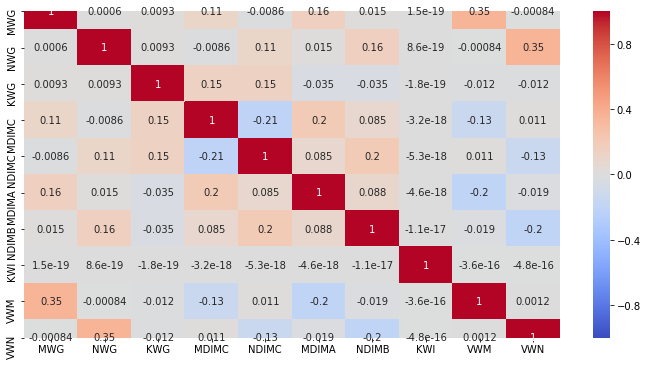

In [3]:
df_new = df_orig[['MWG', 'NWG', 'KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN']].copy()

plt.figure(figsize=(12,6))


sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')